# Методы и модели искусственного интеллекта
#### Курсовая работа
#### Фильтрация выбросов в данных с помощью метода кластеризации DBSCAN
#### Выполнил:Нестеров Станислав АСМ-23-05


# Загрузка данных

Подключение библиотек


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

Загрузка файла

In [2]:
uploaded = files.upload()

Saving Oil well.xlsx to Oil well.xlsx


Представление данных в виде DataFrame

In [3]:
df = pd.read_excel('/content/Oil well.xlsx')

In [4]:
df.iloc[:, :6]

,Date,Oil volume (m3/day),Volume of liquid (m3/day),Gas volume (m3/day),Water volume (m3/day),Water cut (%)
0,2013-01-01,49,70,13055,21,29
1,2013-01-02,49,70,13055,21,29
2,2013-01-03,49,70,13055,21,29
3,2013-01-04,49,70,13055,21,29
4,2013-01-05,44,70,11768,26,36
...,...,...,...,...,...,...
2934,2021-01-14,6,20,1593,15,70
2935,2021-01-15,6,20,1593,15,70
2936,2021-01-16,6,20,1583,14,70
2937,2021-01-17,6,20,1573,14,70


Стандартизация и нормализация данных

In [5]:
df_scaled = StandardScaler().fit_transform(df.iloc[:, 1:6])

In [6]:
df_scaled

array([[ 3.23881643,  0.56550564,  3.20378125, -1.59554229, -4.37392494],
       [ 3.23881643,  0.56550564,  3.20378125, -1.59554229, -4.37392494],
       [ 3.23881643,  0.56550564,  3.20378125, -1.59554229, -4.37392494],
       ...,
       [-1.1999493 , -2.11820351, -1.21116463, -2.1317598 , -0.07288626],
       [-1.1999493 , -2.11820351, -1.21501308, -2.1317598 , -0.07288626],
       [-1.30317641, -2.22555188, -1.27466411, -2.20836231, -0.07288626]])

#Подбор парамтерво для функции DBSCAN

Нахождение среднего расстояния для 8 ближайших соседей

In [7]:
k = 5
nbrs = NearestNeighbors(n_neighbors = k).fit(df_scaled)
distances, indices = nbrs.kneighbors(df_scaled)
distances = np.sort(distances[:, 1:].mean(axis=1))

График расстояния до ближаших соседей

Text(0, 0.5, 'Distances')

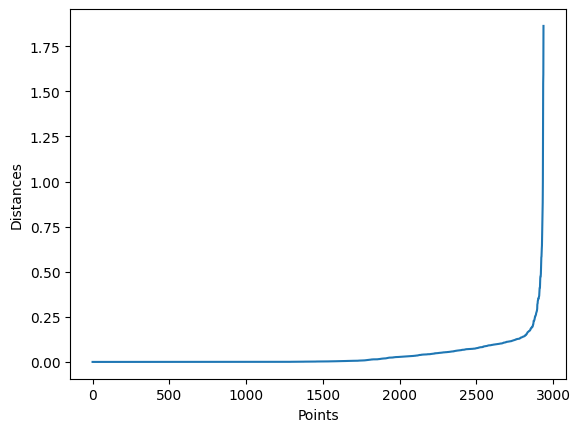

In [8]:
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('Distances')

#Фильтрация промысловых данных

In [24]:
df['Cluster'] = DBSCAN(eps = 0.25, min_samples = k).fit_predict(df_scaled)
df.loc[df['Cluster'] > -1, 'Cluster'] = 0

#Оценка результатов


In [ ]:
df.columns

Index(['Date', 'Oil volume (m3/day)', 'Volume of liquid (m3/day)',
       'Gas volume (m3/day)', 'Water volume (m3/day)', 'Water cut (%) ',
       'Working hours', 'Dynamic level (m)', 'Reservoir pressure (atm)',
       'Cluster'],
      dtype='object')

<Axes: xlabel='Date', ylabel='Water cut (%) '>

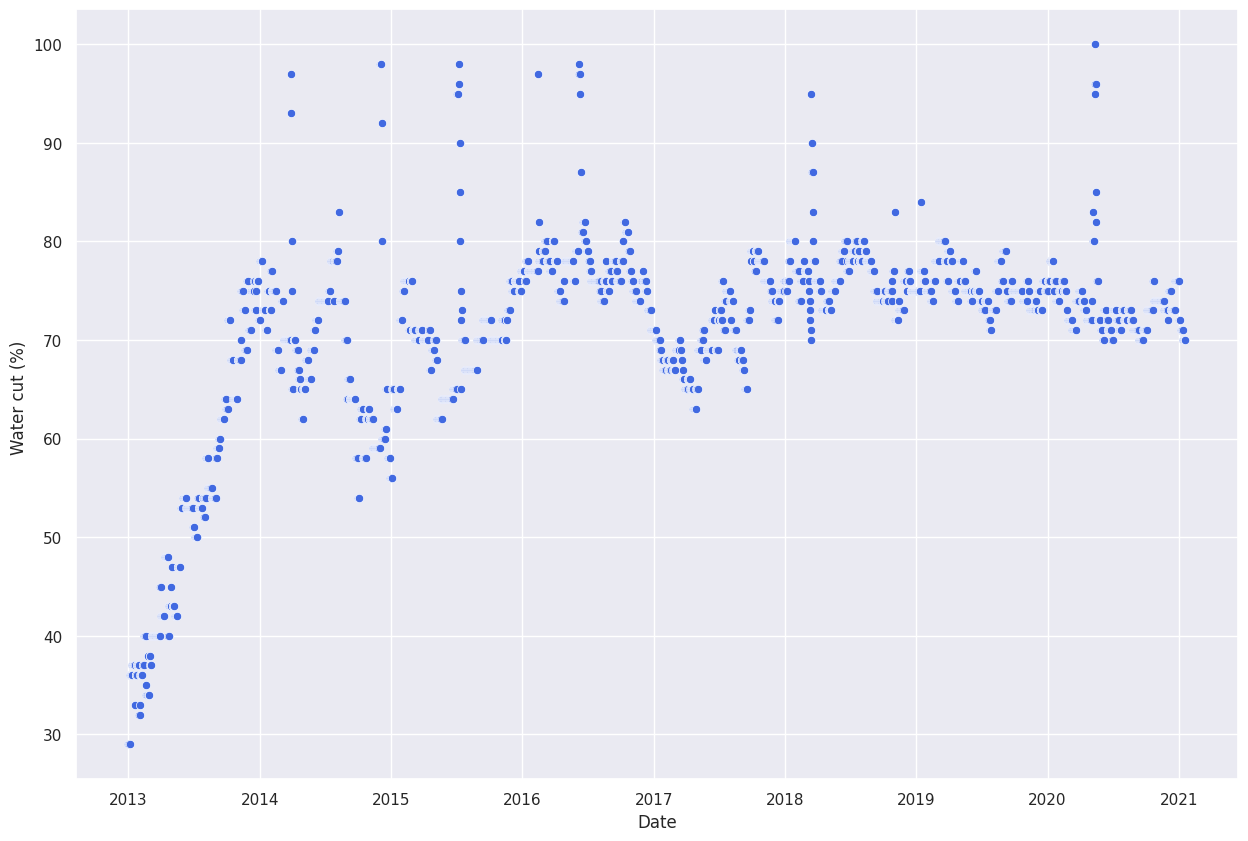

In [29]:
sns.set(rc={'figure.figsize':(15, 10)})
sns.scatterplot(data=df, x="Date", y="Water cut (%) ",
                color=['royalblue'])

<Axes: xlabel='Date', ylabel='Water cut (%) '>

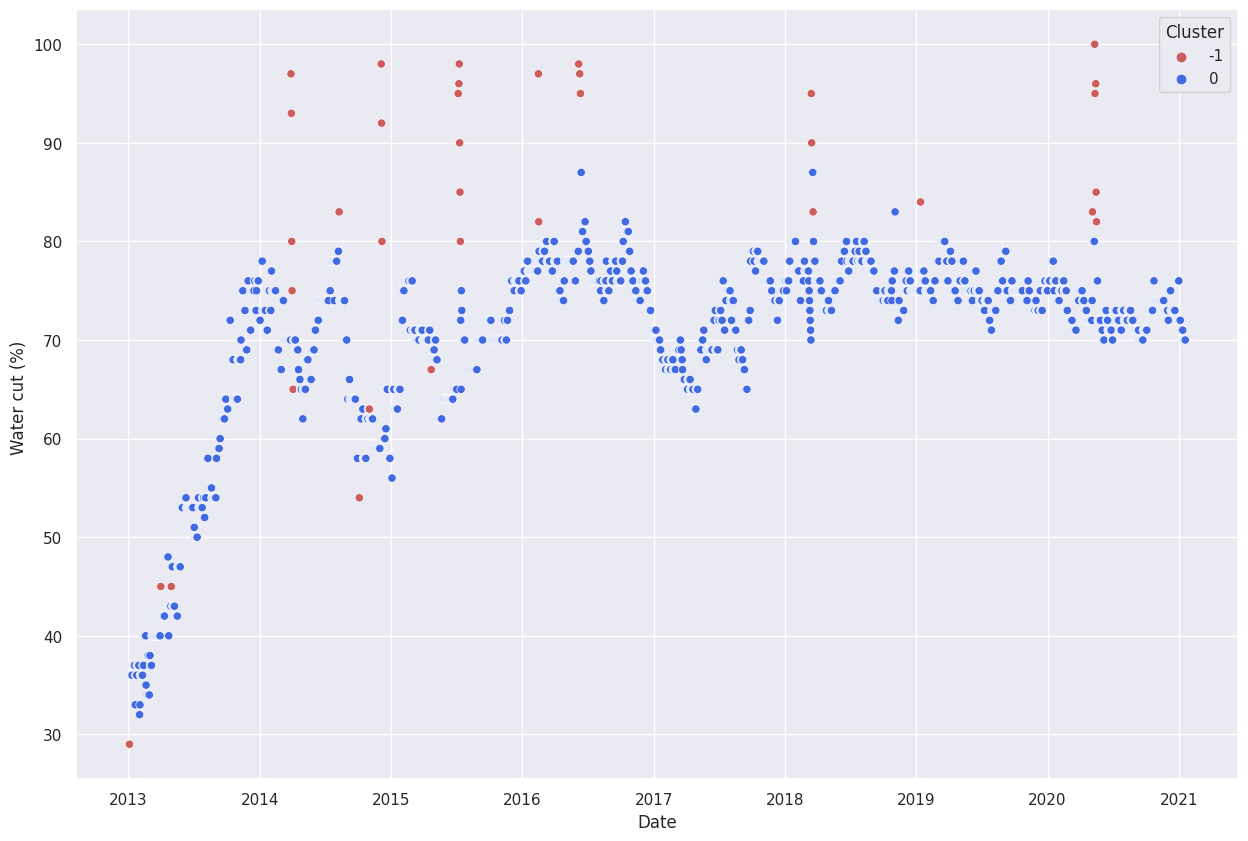

In [30]:
sns.set(rc={'figure.figsize':(15, 10)})
sns.scatterplot(data=df, x="Date", y="Water cut (%) ", hue='Cluster',
                palette=['indianred', 'royalblue'])

<Axes: xlabel='Date', ylabel='Water cut (%) '>

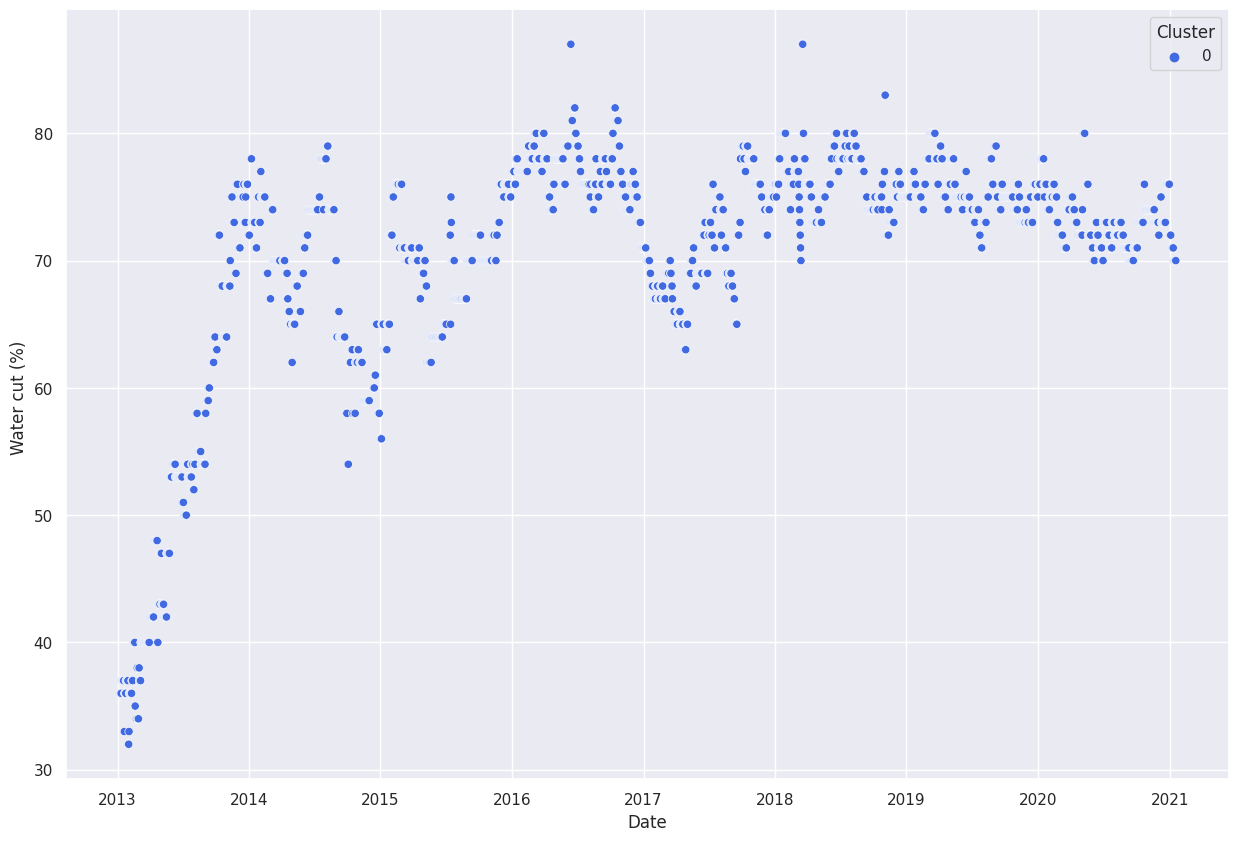

In [31]:
sns.scatterplot(data=df[df.Cluster != -1], x="Date", y="Water cut (%) ",
                hue='Cluster', palette=['royalblue'])

<Axes: xlabel='Date', ylabel='Water volume (m3/day)'>

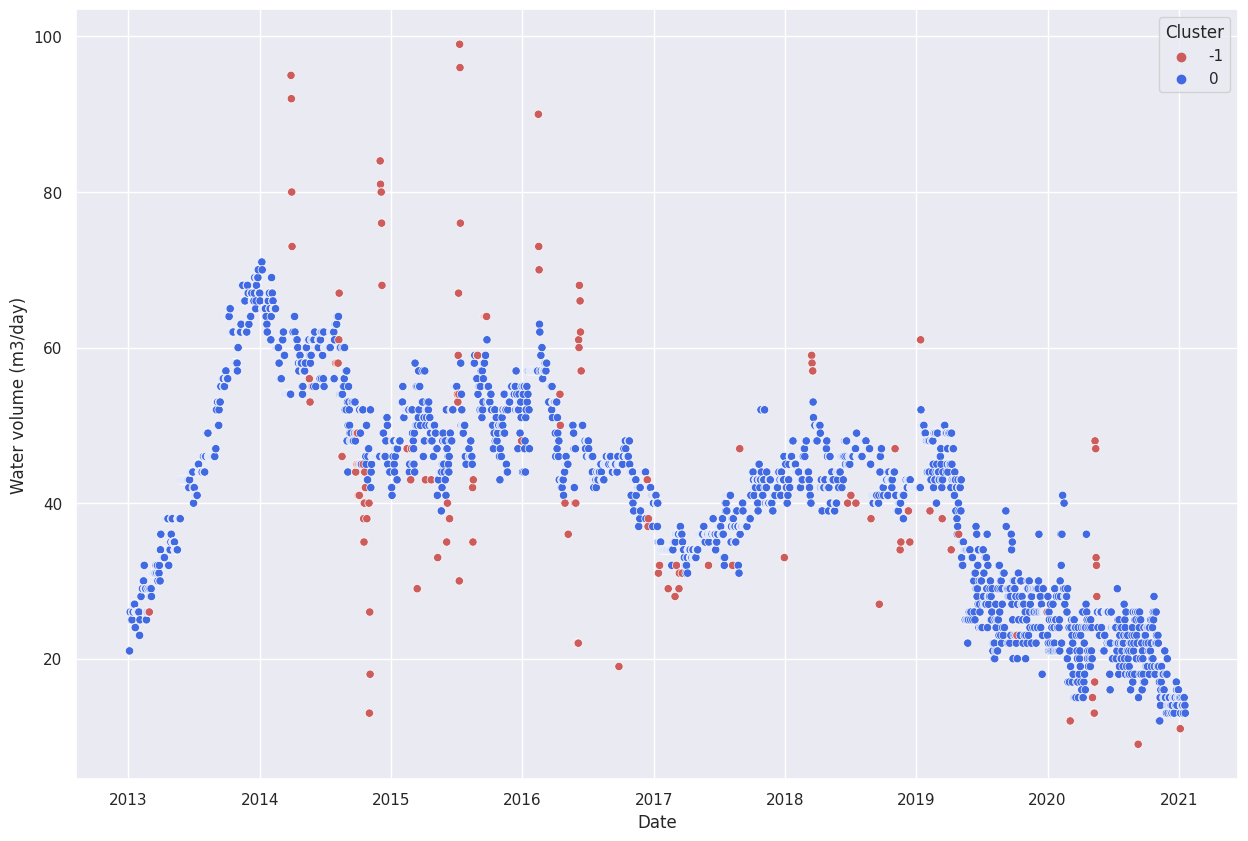

In [ ]:
sns.scatterplot(data=df, x="Date", y="Water volume (m3/day)", hue='Cluster',
                palette=['indianred', 'royalblue'])

<Axes: xlabel='Date', ylabel='Gas volume (m3/day)'>

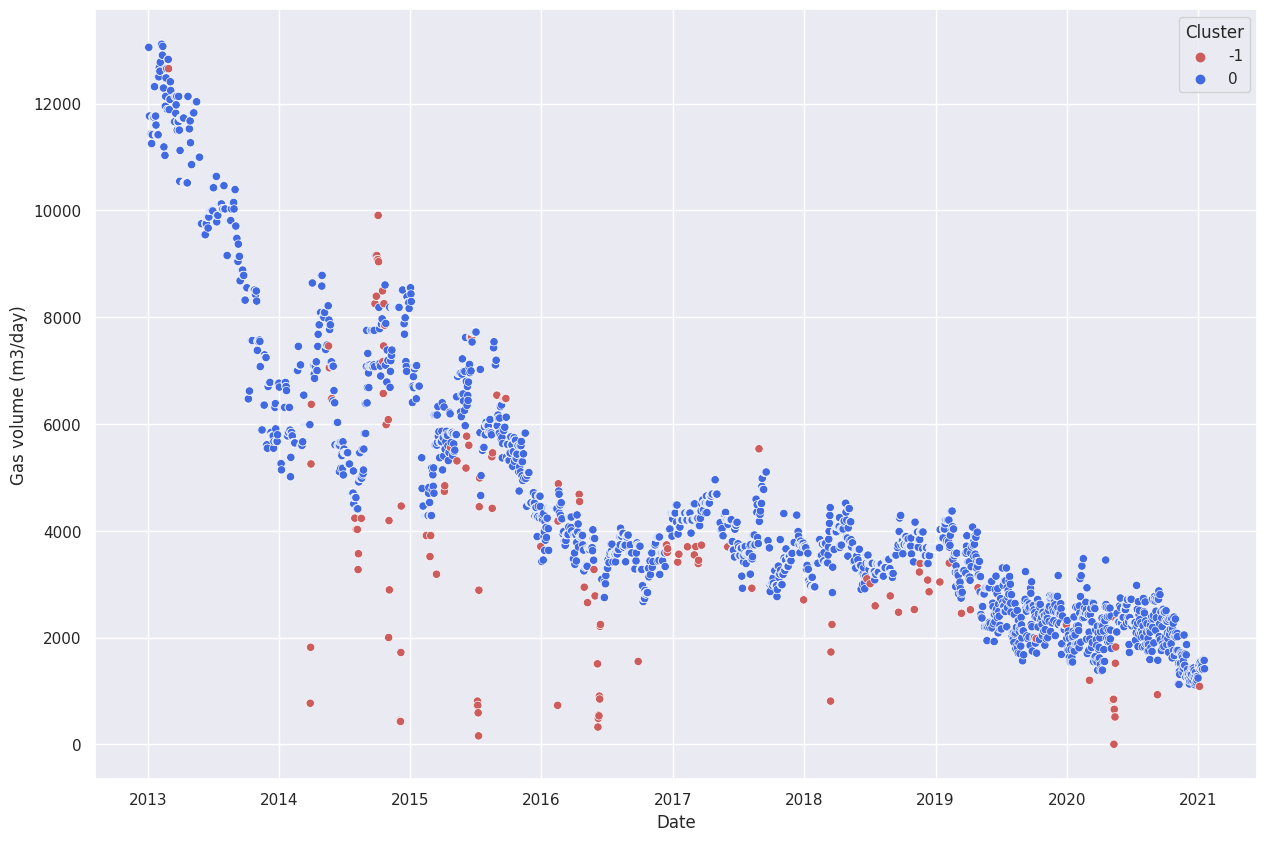

In [ ]:
sns.scatterplot(data=df, x="Date", y="Gas volume (m3/day)", hue='Cluster',
                palette=['indianred', 'royalblue'])

<Axes: xlabel='Date', ylabel='Water cut (%) '>

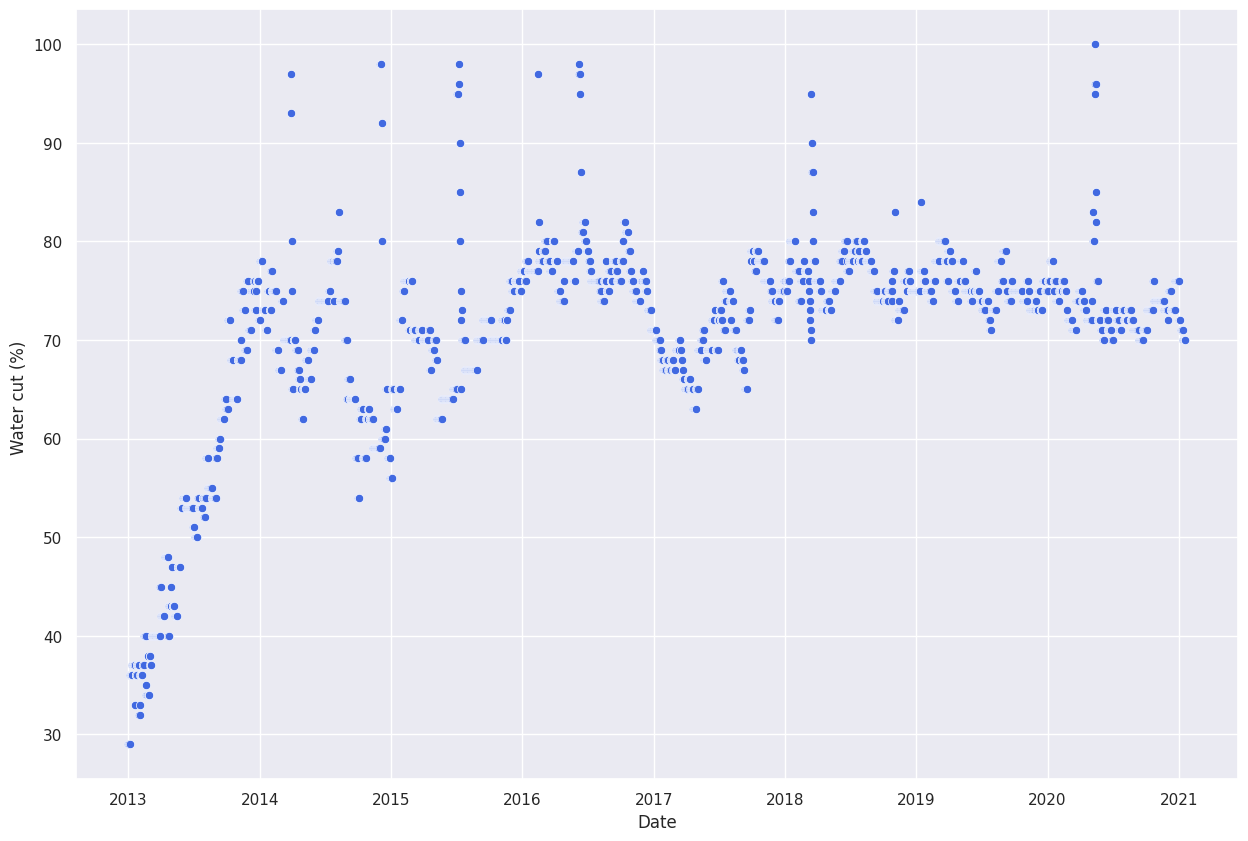

In [ ]:
sns.set(rc={'figure.figsize':(15, 10)})
sns.scatterplot(data=df, x="Date", y="Water cut (%) ",
                color=['royalblue'])

<Axes: xlabel='Date', ylabel='Dynamic level (m)'>

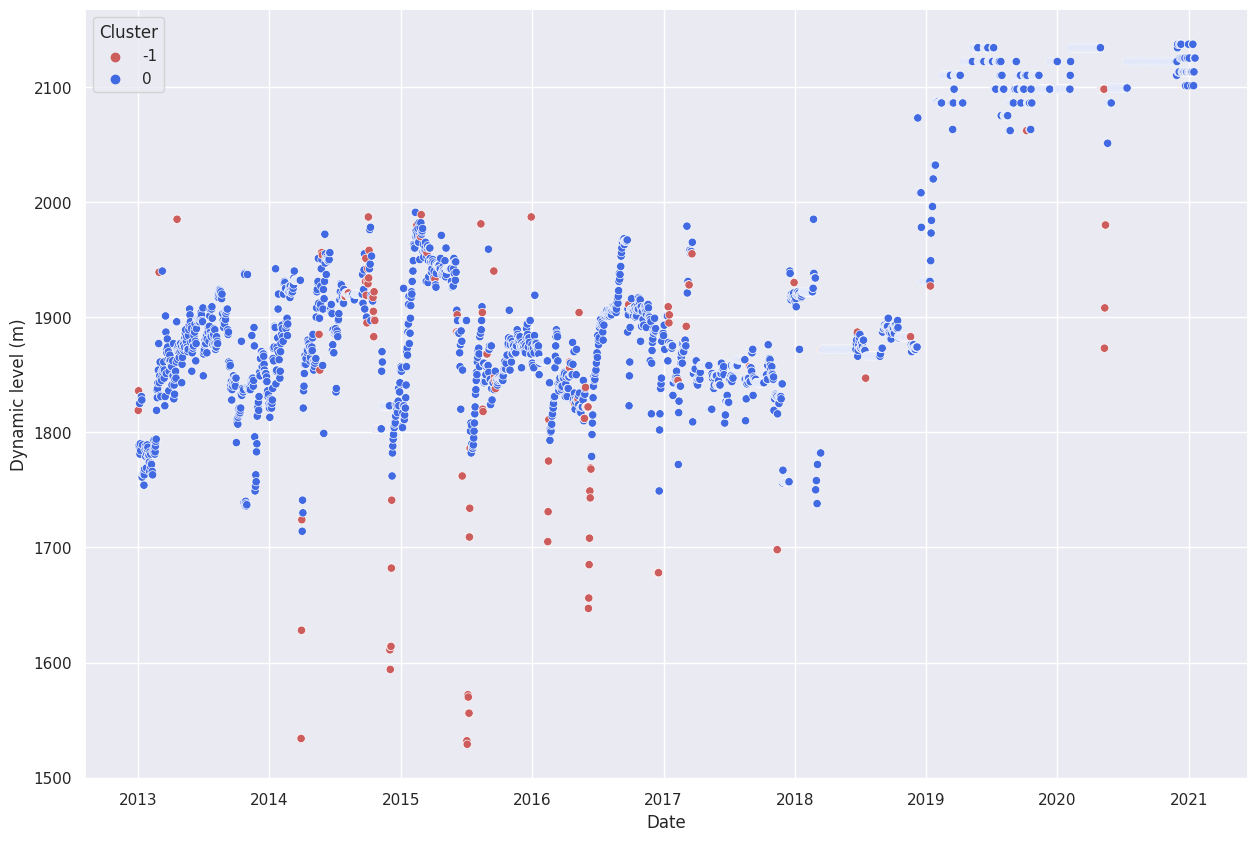

In [ ]:
sns.scatterplot(data=df, x="Date", y="Dynamic level (m)", hue='Cluster',
                palette=['indianred', 'royalblue'])